In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
# 3 classes
'''
Load the datasets for each clas from their numpy files and concatenate them and shuffle. 
The one-hot-encoded labels are shuffled in the exact same arrangement.
'''
import numpy as np

#load numpy binaries
# pos = np.load('datasets/cc/pos_jan21.npy')[:7192] #positive set is already shuffled
# neg = np.load('datasets/cc/neg7192.npy')
# crowded =np.load('datasets/cc/crowded7192.npy')

pos = np.load('datasets/cc/pos_jan21.npy')[:12000] #14k in each class
neg = np.load('datasets/batchjob_3_neg.npy')[:12000]
crowded =np.load('datasets/cc/batchjob_3_crowded.npy')[:12000]

# pos_v = np.load('datasets/cc/pos_val_jan26.npy')[:7192] #same validation set as binary
# neg_v = np.load('datasets/cc/neg7192_val.npy')
# crowded_v =np.load('datasets/cc/crowded7192_val.npy')

pos_v = np.load('datasets/cc/pos_val_jan26.npy')[:2500] #same validation set as binary
neg_v = np.load('datasets/batchjob_3_neg.npy')[12000:]
crowded_v =np.load('datasets/cc/batchjob_3_crowded.npy')[12000:]

# pos_v = np.load('datasets/cc/pos_combined_feb9.npy')[:2500] 
# neg_v = np.load('datasets/cc/neg_val_feb9.npy')
# crowded_v =np.load('datasets/cc/crowded_val_feb9.npy')


#one-hot-encode
py =np.ones((pos.shape[0],3))
for i in range(py.shape[0]): py[i] =[1,0,0]
ny =np.ones((neg.shape[0],3))
for i in range(ny.shape[0]): ny[i] =[0,1,0]
cy =np.ones((crowded.shape[0],3))
for i in range(cy.shape[0]): cy[i] =[0,0,1]
    
py_v =np.ones((pos_v.shape[0],3))
for i in range(py_v.shape[0]): py_v[i] =[1,0,0]
ny_v =np.ones((neg_v.shape[0],3))
for i in range(ny_v.shape[0]): ny_v[i] =[0,1,0]
cy_v =np.ones((crowded_v.shape[0],3))
for i in range(cy_v.shape[0]): cy_v[i] =[0,0,1]


#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg, crowded))#, paper_pos, paper_neg))#, multisource))
y_combined =np.concatenate((py, ny, cy))#, ppy, pny))#, my)) 

x_combined_v =np.concatenate((pos_v, neg_v, crowded_v))#, paper_pos, paper_neg))#, multisource))
y_combined_v =np.concatenate((py_v, ny_v, cy_v))#, ppy, pny))#, my)) 


#shuffle the data sets
# s3 = np.arange(x_combined.shape[0])
# np.random.shuffle(s3)
# x_combined_shuf =x_combined[s3]
# y_combined_shuf = y_combined[s3]

s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined =x_combined[s3]
y_combined = y_combined[s3]

In [1]:
#133 AUG REALS AR VALIDATION

import numpy as np

pos = np.load('datasets/cc/pos_jan21.npy')[:12000-2000]#[:12000-2128] #14k in each class
neg = np.load('datasets/batchjob_3_neg.npy')[:12000]
crowded =np.load('datasets/cc/batchjob_3_crowded.npy')[:12000]

'''-------------'''
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/augmented_real_no_orig/"#HSTLens_detections/"

l= os.listdir(PATH)

pos_v = np.zeros((len(l),1,100,100))
count=0
fails=0
for filename in l:
    
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
       

      
    except:
        fails+=1
        print("skipped due to non-existent image, or conversion error")
        
        
    count+=1
    
s3 = np.arange(pos_v.shape[0])#shuffle it
np.random.shuffle(s3)
pos_v =pos_v[s3]
'''-------------'''
pos = np.concatenate(( pos, pos_v[:2000]))#add reals to trainign set
neg_v = np.load('datasets/batchjob_3_neg.npy')[12000:13000]#[12000:]
crowded_v =np.load('datasets/cc/batchjob_3_crowded.npy')[12000:13000]#[12000:]



#one-hot-encode
py =np.ones((pos.shape[0],3))
for i in range(py.shape[0]): py[i] =[1,0,0]
ny =np.ones((neg.shape[0],3))
for i in range(ny.shape[0]): ny[i] =[0,1,0]
cy =np.ones((crowded.shape[0],3))
for i in range(cy.shape[0]): cy[i] =[0,0,1]
    
py_v =np.ones((pos_v.shape[0],3))
for i in range(py_v.shape[0]): py_v[i] =[1,0,0]
ny_v =np.ones((neg_v.shape[0],3))
for i in range(ny_v.shape[0]): ny_v[i] =[0,1,0]
cy_v =np.ones((crowded_v.shape[0],3))
for i in range(cy_v.shape[0]): cy_v[i] =[0,0,1]


#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg, crowded))#, paper_pos, paper_neg))#, multisource))
y_combined =np.concatenate((py, ny, cy))#, ppy, pny))#, my)) 

x_combined_v =np.concatenate((pos_v[2000:], neg_v, crowded_v))#, paper_pos, paper_neg))#, multisource))
y_combined_v =np.concatenate((py_v[2000:], ny_v, cy_v))#, ppy, pny))#, my)) 



s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined =x_combined[s3]
y_combined = y_combined[s3]

/home/robbie/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype >f8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


MemoryError: 

In [3]:
PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/augmented_real_no_orig/"#HSTLens_detections/"

l= os.listdir(PATH)

pos_v = np.zeros((len(l),1,100,100))
count=0
fails=0
for filename in l:
    
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
       

      
    except:
        fails+=1
        print("skipped due to non-existent image, or conversion error")
        
        
    count+=1
    
pos_v.shape

(3059, 1, 100, 100)

curr num 23 next=1, exit=00


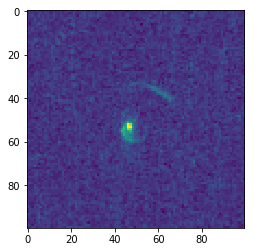

In [5]:
##### quickly view some images
'''
This cell allows for quick viewing of training examples that you've created. 
You can uncomment lines to plot the original images besided the finished product.
'''
from astropy.visualization import (ZScaleInterval, ImageNormalize)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os
pos = np.load('datasets/cc/pos_combined_feb9.npy') #14k in each class

ims1 = pos_v

sp=int(input("start position"))
for i in range(len(ims1)):
    exit=False
    


    while(1):

        display.clear_output(wait=True)

        
        ans = int(input("curr num "+str(i+sp)+" next=1, exit=0"))
        plt.imshow((ims1[i+sp][0]))#,cmap='gray') 
#         norm = ImageNormalize(ims1[i+sp][0], interval = ZScaleInterval())
#         plt.imshow(ims1[i+sp][0],norm=norm, cmap='gray')
        plt.pause(0.01) 
        
        if ans ==5:
            break
        if ans==0:
            exit=True
            break

    if exit==True:
        break


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
'''
Load the model files, build architecture, train and sav weights. Save all samples after 50000 for validation.
It might be better ot keep a set completely seperate for validation. 
'''

from HSTLens_resnet_3class_arch12 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=30, batch_size=32)
my_model._build() 

val=[x_combined_v,y_combined_v]

my_model._fit(x_combined,y_combined, val)

# my_model.model.save("weights/3_class_weights") # issue with json serializing
my_model.model.save_weights("weights/3arch_12_37")
# my_model.model.load_weights("multiclass4_ensemble_1")


Using TensorFlow backend.


building 3class arch 10
(?, 1, 100, 100)
3arch10
...Fitting model ...
Train on 36000 samples, validate on 7284 samples
Epoch 1/30
 1280/36000 [>.............................] - ETA: 2:42 - loss: 1.1409 - acc: 0.5203

KeyboardInterrupt: 

In [4]:
#build and load weights
from HSTLens_resnet_3class_arch12 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=8, batch_size=32)
my_model._build() 
my_model.model.load_weights('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/weights/3arch12_26/epoch_weights00000009.h5')


building 3class arch 10
(?, 1, 100, 100)
3arch10


/home/robbie/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


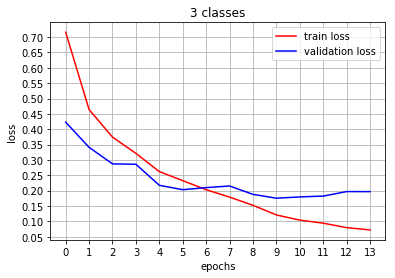

In [3]:
#plot the loss vs epochs
#my_model.model.history is a callback obj my_model.model.history is a dict
import matplotlib.pyplot as plt
train_loss = my_model.model.history.history['loss'] 
val_loss = my_model.model.history.history['val_loss']

ep=14
xc = range(ep)

plt.figure()
plt.title('3 classes')
plt.xlabel('epochs');
plt.ylabel('loss')
plt.xticks(np.arange(0, ep, step=1))
plt.yticks(np.arange(0, 1, step=0.05))
plt.plot(xc, train_loss,'r-',label="train loss")
plt.plot(xc, val_loss, 'b-',label="validation loss")
plt.grid('on')
plt.legend()

...Generating Predictions ...


Text(0,0.5,'Percentage of Rankings')

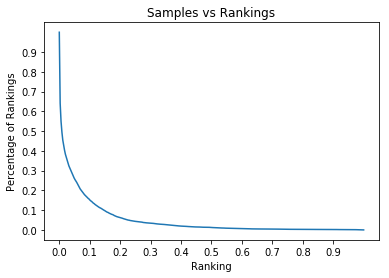

In [67]:
#quickly get predicitons using 1 model only
import numpy as np
from sklearn.preprocessing import minmax_scale

test_set = np.load('datasets/cc/test_set.npy')

for i in range(len(test_set)):
    
    tmp_image = test_set[i].reshape(-1,)                    
    tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
    test_set[i] = tmp_image.reshape(1,100,100) 


predictions  = my_model._predict(test_set, y= None, discrete = False)

new = np.zeros((10000,1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]

import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import numpy as np
import os 
import time
lens=new

x_axis = np.linspace(0,1, num=350)
tens_list = [lens]
for i in range(len(x_axis-1)):
    tens_list.append([])
    
    
def work(element,limit):
    for probability in (tens_list[element]): #check the previous percentage bin
        if probability>limit:
            tens_list[element+1].append(probability)
    return len(tens_list[element+1])

y_axis =[]
for i in range(len(x_axis-1)):
    y_axis.append(work(i,x_axis[i]))
    

plt.plot(x_axis[0:],np.array(y_axis[0:]).astype(float)/y_axis[0])
plt.title('Samples vs Rankings')
plt.yticks(np.arange(0,1, 0.1))
plt.xticks(np.arange(0,1, 0.1))

plt.xlabel('Ranking')
plt.ylabel('Percentage of Rankings')

In [85]:
a= np.array(y_axis[0:]).astype(float)/y_axis[0]
i=235



a[i],x_axis[i]

(0.004572241414346677, 0.673352435530086)

In [14]:
# closer inspection
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
# PATH ="/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/augmented_real133/"# 
PATH ="/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/out/"#HSTLens_detections/"
l= os.listdir(PATH)

ims = np.zeros((len(l),1,100,100))
count=0
fails=0
for filename in l:
    
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        ims[count]=data
       

      
    except:
        fails+=1
        print("skipped due to non-existent image, or conversion error")
        
        
    count+=1

print('fails '+str(fails))



#######-----------------

predictions  = my_model._predict(ims, y= None, discrete = False)
new = np.zeros((predictions.shape[0],1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]

fails 0
...Generating Predictions ...


In [4]:
# closer inspection
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

pos_v = np.load('datasets/cc/pos_combined_feb9.npy')

predictions  = my_model._predict(pos_v, y= None, discrete = False)
new = np.zeros((predictions.shape[0],1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]

NameError: name 'my_model' is not defined

In [8]:
count=0
for i in range(len(new)):
    if new[i]>   0.5616045845272206:
        count+=1
print float(count)
print float(count)/predictions.shape[0]

2363.0
0.785571808511


***

# getting ROC curves with common thresholds

In [1]:
#build and load weights
from HSTLens_resnet_3class_arch12 import deeplens_classifier


my_model = deeplens_classifier(n_epochs=8, batch_size=32)
my_model._build() 
my_model.model.load_weights(
    '/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/weights/3arch12_26/epoch_weights00000009.h5')#("weights/2_class_weights_dim")


Using TensorFlow backend.
W1005 13:32:10.471591 139692757808960 deprecation_wrapper.py:119] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1005 13:32:10.482341 139692757808960 deprecation_wrapper.py:119] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1005 13:32:10.486490 139692757808960 deprecation_wrapper.py:119] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1005 13:32:10.496129 139692757808960 deprecation_wrapper.py:119] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/

building 3class arch 10
(?, 1, 100, 100)
3arch10


W1005 13:32:11.192801 139692757808960 deprecation.py:506] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1005 13:32:11.233462 139692757808960 deprecation_wrapper.py:119] From /home/robbie/python_environments/python27/local/lib/python2.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale

test_set = np.load('datasets/cc/test_set.npy')
for i in range(len(test_set)):
    
    tmp_image = test_set[i].reshape(-1,)                    
    tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
    test_set[i] = tmp_image.reshape(1,100,100) 
    
predictions_neg  = my_model._predict(test_set, y= None, discrete = False)


pos_v = np.load('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/new_test_positives_merged_m31_aug_no_blanks.npy')#np.load('datasets/cc/pos_combined_feb9.npy')
# PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/out/"#HSTLens_detections/"
# l= os.listdir(PATH)
# pos_v = np.zeros((len(l),1,100,100))
# count =0
# for filename in l:
#     try:  
#         data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
#         tmp_image = np.nan_to_num(data).reshape(-1,)                    
#         tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
#         data = tmp_image.reshape(1,100,100) 
#         pos_v[count]=data
#     except:
#         print("skipped due to non-existent image, or conversion error")
#     count+=1
    
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)

neg_len = predictions_neg.shape[0]
pos_len = predictions_pos.shape[0]

predictions_combined = np.zeros((neg_len+pos_len,))
labels_combined = np.zeros((neg_len+pos_len,))

for i in range(neg_len):
    predictions_combined[i]=  predictions_neg[i][0]
    
for i in range(pos_len):
    predictions_combined[neg_len+i] =  predictions_pos[i][0]
    labels_combined[neg_len+i] = 1
    
predictions_neg.shape, predictions_combined.shape

SyntaxError: invalid syntax (<ipython-input-4-f3ed630ecfed>, line 51)

In [2]:
#for testing on the new candidates
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale


PATH ='/home/robbie/repos/HSTLens/make_simulations/new_candidates/'
l= os.listdir(PATH)
pos_v = np.zeros((len(l),1,100,100))
count =0
for filename in l:
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
    except:
        print("skipped due to non-existent image, or conversion error")
    count+=1
    
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)

for i in range(4):
    print(predictions_pos[i][0]) u

SyntaxError: invalid syntax (<ipython-input-2-ae774c99fce5>, line 30)

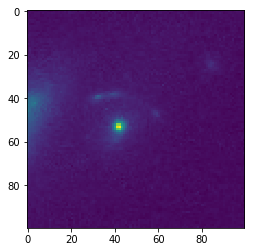

In [66]:
#for testing on the new candidates
plt.imshow(pos_v[3][0])

In [3]:
#for testing on the new candidates
import os
from astropy.io import fits
from sklearn.preprocessing import minmax_scale

PATH = "clean_test_neg_aug/"
l= os.listdir(PATH)
test_neg = np.zeros((len(l),1,100,100))
count =0
for filename in l:
#     try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        data = np.nan_to_num(data)
        
#         data =np.clip(data, data[30:70,30:70].min(), data[30:70,30:70].max(), out=None) #added in this line
        
        tmp_image = data.reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        test_neg[count]=data
#     except:
#         print("skipped due to non-existent image, or conversion error")
#     count+=1
    
    
predictions_neg  = my_model._predict(test_neg, y= None, discrete = False)

count=0
for i in range(len(new)):
    if new[i]>   0.5:
        count+=1
print (float(count))
print (float(count)/predictions_neg.shape[0])

ImportError: No module named astropy.io

In [1]:
'''
for using the manually cleaned negatives.
'''

from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale
    
PATH = "clean_test_neg_aug/"
l= os.listdir(PATH)
test_neg = np.zeros((len(l),1,100,100))
count =0
for filename in l:
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        data = np.nan_to_num(data)
        
        data =np.clip(data, data[30:70,30:70].min(), data[30:70,30:70].max(), out=None) #added in this line
        
        tmp_image = data.reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        test_neg[count]=data
    except:
        print("skipped due to non-existent image, or conversion error")
    count+=1
    
    
predictions_neg  = my_model._predict(test_neg, y= None, discrete = False)


pos_v = np.load('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/new_test_positives_merged_m31_aug_no_blanks.npy')#np.load('datasets/cc/pos_combined_feb9.npy')
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)


neg_len = predictions_neg.shape[0]
pos_len = predictions_pos.shape[0]

predictions_combined = np.zeros((neg_len+pos_len,))
labels_combined = np.zeros((neg_len+pos_len,))

for i in range(neg_len):
    predictions_combined[i]=  predictions_neg[i][0]
    
for i in range(pos_len):
    predictions_combined[neg_len+i] =  predictions_pos[i][0]
    labels_combined[neg_len+i] = 1
    
predictions_neg.shape, predictions_combined.shape    

NameError: name 'my_model' is not defined

In [69]:
''' NOT FOR MAKING ROC
store all the prediction of the 10,000 negative set in a list that are under threshold. 
Want to see what the false positives at low FPR look like.'''
fp_list = []#list of FP at low FPR
thresh =0.5644699140401146
for i in range(len(predictions_neg)):
    if predictions_neg[i][0]>thresh:
        fp_list.append(i)
    

Text(0,0.5,'TPR')

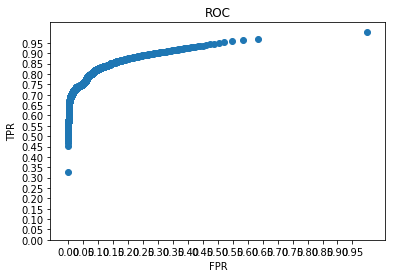

In [57]:


score = predictions_combined
y =labels_combined

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
thr = np.linspace(0.0, 1, 5000) #changed from 1000 to 5000 on march 23 2019
FP=0
TP=0
N = neg_len
P = pos_len

for thresh in thr:
    for i in range(len(score)):
        if (score[i] >= thresh):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
                
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0

# fpr_2arch12_9 = roc_x
# tpr_2arch12_9 = roc_y

plt.scatter(roc_x,roc_y)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

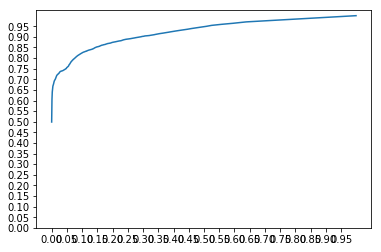

In [58]:
import numpy as np
from scipy import interpolate

# fpr_unique, indices = np.unique(np.array(fpr_2arch12_9), return_index=True)
# tpr_unique =np.array(tpr_2arch12_9)[indices]

fc = interpolate.interp1d(np.flip(np.array(roc_x)), np.flip(np.array(roc_y)), kind=1)
xn =np.arange(0.000,1,0.001)
yn = fc(xn)

fpr_3arch12_1=xn
tpr_3arch12_26=yn

plt.plot(xn,yn)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.yticks(np.arange(0, 1, step=0.05))
plt.show()

In [59]:
fc(0.01)

array(0.69558)